## Exercise 3.2

In [15]:
import time
from matplotlib import pyplot as plt
import numpy as np
from scipy.optimize import root

# Set traditional parameters
S = 80
β = 0.96**(80/S)
α = 0.35
A = 1
σ = 3
δ = 1 - (1-0.05)*(80/S)


# Return on labor
def wf(bvec, nvec):
    b = np.sum(bvec)
    n = np.sum(nvec)
    w = (1-α)*A*(b/n)**α
    return(w)

# Return on capital
def rf(bvec, nvec):
    b = np.sum(bvec)
    n = np.sum(nvec)
    r = α*A*(n/b)**(1-α)-δ
    return(r)


# Uprime
def uprime(c):
    if c > 0: 
        return c**(-σ)
    else:
        return 5000000000
    
def cf(b_ss, nvec):
    c_ss = np.empty(S)
    c_ss[0] = wf(b_ss, nvec) - b_ss[0]
    for i in range(1, S-1):
        c_ss[i] = wf(b_ss, nvec) - b_ss[i] + b_ss[i-1]*(1+rf(b_ss, nvec))
    
    c_ss[-1] = wf(b_ss, nvec) * nvec[-1] + (1+rf(b_ss, nvec))*b_ss[-1]
    
    return c_ss
    

def system(bvec):
    
    c = cf(bvec, nvec)
    wc = wf(bvec, nvec)
    rc = rf(bvec, nvec)
    Sol = []

    for i in range(S-1):
        Sol.append(uprime(c[i]) - β*(1+rc)*uprime(c[i+1]))

    return(Sol)



def solve(bvec_guess):
    
    print("running solve")
    b_ss = root(system, bvec_guess).x
    c_ss = cf(b_ss, nvec)
    print("b_ss is ", b_ss)
    print("c_ss is ", c_ss)

    return b_ss, c_ss #, wc, rc, K_ss, L
    


def get_SS(params, bvec_guess, SS_graphs):
    nvec, A, α, δ, β, S = params
    
    start_time = time.clock()
    
    # Solve for the optimal c, b
    b_ss, c_ss = solve(bvec_guess)
    
    K_ss = np.sum(b_ss)
    L_ss = np.sum(nvec)
    
    # Compute Euler Error
    r_ss = rf(b_ss, nvec)
    w_ss = wf(b_ss, nvec)
    Y_ss = A * K_ss**α * L_ss**(1-α)
    C_ss = np.sum(c_ss)
    
    # The euler errors
    EulerErrors = system(b_ss)
    
    # Resource counstraint
    
    ss_time = time.clock() - start_time # Place at end of get_SS()
    print('It took %1.3s seconds to solve the OLG model' % ss_time)
    
    ss_output = {
    'b_ss': b_ss, 'c_ss': c_ss, 'w_ss': w_ss, 'r_ss': r_ss,
    'K_ss': K_ss, 
    'EulerErrors': EulerErrors, 
    'ss_time': ss_time}
    

    return ss_output

In [16]:
bvec = \
    np.array([-0.01, 0.1, 0.2, 0.23, 0.25, 0.23, 0.2, 0.1,
    -0.01, 0.1, 0.2, 0.23, 0.25, 0.23, 0.2, 0.1,
    -0.01, 0.1, 0.2, 0.23, 0.25, 0.23, 0.2, 0.1,
    -0.01, 0.1, 0.2, 0.23, 0.25, 0.23, 0.2, 0.1,
    -0.01, 0.1, 0.2, 0.23, 0.25, 0.23, 0.2, 0.1,
    -0.01, 0.1, 0.2, 0.23, 0.25, 0.23, 0.2, 0.1,
    -0.01, 0.1, 0.2, 0.23, 0.25, 0.23, 0.2, 0.1,
    0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
    0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
    0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

print(bvec.shape)
np.sum(bvec)

(79,)


11.399999999999997

In [17]:
S= 80
nvec = np.ones(S)
index = round(2*S/3)+1
nvec[index:] = 0.2
params = nvec, A, α, δ, β, S
result = get_SS(params, bvec, False)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:75: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


running solve
b_ss is  [0.13150092 0.2636643  0.3964732  0.5299091  0.66395181 0.79857936
 0.93376786 1.06949139 1.20572185 1.34242883 1.47957942 1.61713809
 1.75506647 1.89332321 2.03186372 2.17064    2.3096004  2.44868937
 2.58784721 2.72700979 2.86610824 3.00506868 3.14381183 3.2822527
 3.42030017 3.55785664 3.69481752 3.83107086 3.96649679 4.10096703
 4.23434435 4.36648192 4.49722275 4.62639897 4.75383111 4.87932738
 5.00268281 5.12367841 5.24208024 5.35763843 5.47008609 5.57913826
 5.68449067 5.78581849 5.88277497 5.97498999 6.06206855 6.14358911
 6.21910185 6.2881268  6.35015192 6.40463089 6.45098095 6.48858045
 6.51676633 6.53483138 6.54202133 6.5375318  6.52050498 6.49002611
 6.44511978 6.38474592 6.30779557 6.21308633 6.0993576  5.96526539
 5.80937686 5.6301645  5.42599995 5.19514732 4.93575616 4.64585397
 4.32333816 3.96596754 3.57135322 3.13694891 2.6600406  2.13773557
 1.56695068]
c_ss is  [1.0489989  1.05695684 1.06497515 1.0730543  1.08119473 1.08939692
 1.09766133 1.1059

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


<function matplotlib.pyplot.show(*args, **kw)>

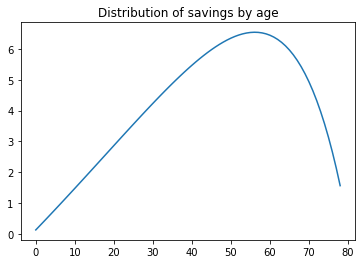

In [18]:
plt.plot(result['b_ss'])
plt.title('Distribution of savings by age')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

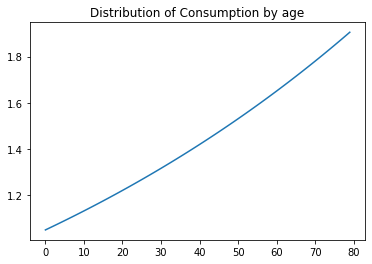

In [19]:
plt.plot(result['c_ss'])
plt.title('Distribution of Consumption by age')
plt.show